# Getting started
This notebook illustrates the basic usage of Vis4D. We run Faster R-CNN on COCO images.

## CLI
The following is an example using provided Faster R-CNN toy config file to run training and inference on COCO images.

### Inference
Run inference on the validation set.

In [6]:
!vis4d test --config faster_rcnn_example.py --config.params.num_epochs 1

[09/06 00:38:10 Vis4D]: Environment info: PyTorch version: 2.0.1
Is debug build: False
CUDA used to build PyTorch: None
ROCM used to build PyTorch: N/A

OS: macOS 13.5.1 (arm64)
GCC version: Could not collect
Clang version: 14.0.3 (clang-1403.0.22.14.1)
CMake version: Could not collect
Libc version: N/A

Python version: 3.10.8 (main, Nov 24 2022, 08:08:27) [Clang 14.0.6 ] (64-bit runtime)
Python platform: macOS-13.5.1-arm64-arm-64bit
Is CUDA available: False
CUDA runtime version: No CUDA
CUDA_MODULE_LOADING set to: N/A
GPU models and configuration: No CUDA
Nvidia driver version: No CUDA
cuDNN version: No CUDA
HIP runtime version: N/A
MIOpen runtime version: N/A
Is XNNPACK available: True

CPU:
Apple M2

Versions of relevant libraries:
[pip3] mypy==1.3.0
[pip3] mypy-extensions==1.0.0
[pip3] numpy==1.24.3
[pip3] pytorch-lightning==2.0.3
[pip3] torch==2.0.1
[pip3] torchaudio==2.0.2
[pip3] torchmetrics==0.11.4
[pip3] torchvision==0.15.2
[conda] numpy                     1.24.3             

### Training
Run the training for 1 epoch and inference on the validation set.

In [7]:
!vis4d fit --config faster_rcnn_example.py --config.params.num_epochs 1

[09/06 00:38:21 Vis4D]: Environment info: PyTorch version: 2.0.1
Is debug build: False
CUDA used to build PyTorch: None
ROCM used to build PyTorch: N/A

OS: macOS 13.5.1 (arm64)
GCC version: Could not collect
Clang version: 14.0.3 (clang-1403.0.22.14.1)
CMake version: Could not collect
Libc version: N/A

Python version: 3.10.8 (main, Nov 24 2022, 08:08:27) [Clang 14.0.6 ] (64-bit runtime)
Python platform: macOS-13.5.1-arm64-arm-64bit
Is CUDA available: False
CUDA runtime version: No CUDA
CUDA_MODULE_LOADING set to: N/A
GPU models and configuration: No CUDA
Nvidia driver version: No CUDA
cuDNN version: No CUDA
HIP runtime version: N/A
MIOpen runtime version: N/A
Is XNNPACK available: True

CPU:
Apple M2

Versions of relevant libraries:
[pip3] mypy==1.3.0
[pip3] mypy-extensions==1.0.0
[pip3] numpy==1.24.3
[pip3] pytorch-lightning==2.0.3
[pip3] torch==2.0.1
[pip3] torchaudio==2.0.2
[pip3] torchmetrics==0.11.4
[pip3] torchvision==0.15.2
[conda] numpy                     1.24.3             

## Python API
You can also compose the model and dataset through Python API.

First, import the necessary components from the library.

In [8]:

from vis4d.model.detect.faster_rcnn import FasterRCNN

from vis4d.data.const import CommonKeys as K
from vis4d.vis.functional.image import imshow_bboxes

from vis4d.config import instantiate_classes
from vis4d.config.common.datasets.coco import get_coco_detection_cfg

Now, let's create the dataset and fetch the image from it.

In [9]:

# Create dataloader for COCO using the default config
dataloader_cfg = get_coco_detection_cfg(
    "data/coco_test/",
    train_split="train",
    test_split="train",
    samples_per_gpu=1,
    workers_per_gpu=0,
    cache_as_binary=False,
)

test_dataloader = instantiate_classes(dataloader_cfg.test_dataloader)[0]
batch = next(iter(test_dataloader))
inputs, images_hw = (
    batch[K.images],
    batch[K.input_hw],
)

Generating COCODataset(root=data/coco_test/, split=train, use_pascal_voc_cats=False) data mapping...
Loading COCODataset(root=data/coco_test/, split=train, use_pascal_voc_cats=False) takes 0.00 seconds.


Next, we can initialize and run the model on it.

In [10]:

faster_rcnn = FasterRCNN(num_classes=80, weights="mmdet")

faster_rcnn.eval()
dets = faster_rcnn(inputs, images_hw, original_hw=images_hw)

Load checkpoint from http path: https://download.pytorch.org/models/resnet50-0676ba61.pth
/Users/royyang/Workspace/vis4d/vis4d/common/ckpt.py:374: UserWarning: The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

  rank_zero_warn(err_msg)
Load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Finally, let's visualize the result.

torch.Size([3, 800, 1248]) torch.Size([52, 4])


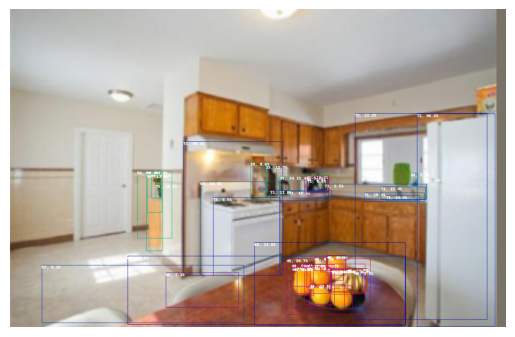

In [11]:
print(inputs[0].shape, dets.boxes[0].shape)
imshow_bboxes(inputs[0], dets.boxes[0], dets.scores[0], dets.class_ids[0])